## Import Library

In [3]:
import pandas as pd
import numpy as np
from datetime import date, datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

## Data Understanding

In [4]:
##Read data
df = pd.read_csv("online_shoppers_intention.csv")
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
#Check the number of rows and column of the df set
rows, cols = df.shape
print("Number of rows:", rows)
print("Number of columns:", cols)

Number of rows: 12330
Number of columns: 18


In [6]:
#Information on features 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [7]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [8]:
#Calculate percent of revenue(who have make payment)
#Revenue is our target for prediction
total_rev = df['Revenue'].sum()
total = df.shape[0]
res_percent = round((total_rev / total) * 100,2)

print(total_rev, 'customers making payment out of', total,'customers.')

1908 customers making payment out of 12330 customers.


In [9]:
cols_to_check = ["Month", "Weekend", "VisitorType"]

for col in cols_to_check:
    unique_vals = df[col].unique()
    n_unique = df[col].nunique()
    print(f"\nColumn: {col}")
    print(f"Number of unique values: {n_unique}")
    print("Unique values:", unique_vals)



Column: Month
Number of unique values: 10
Unique values: ['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']

Column: Weekend
Number of unique values: 2
Unique values: [False  True]

Column: VisitorType
Number of unique values: 3
Unique values: ['Returning_Visitor' 'New_Visitor' 'Other']



ANALYSIS: Administrative
Total Records: 12330
Mean: 2.32
Median: 1.00
Std Dev: 3.32
Range: [0.00, 27.00]
IQR: 4.00
Outlier Bounds: [-6.00, 10.00]
Outliers Found: 404 (3.28%)


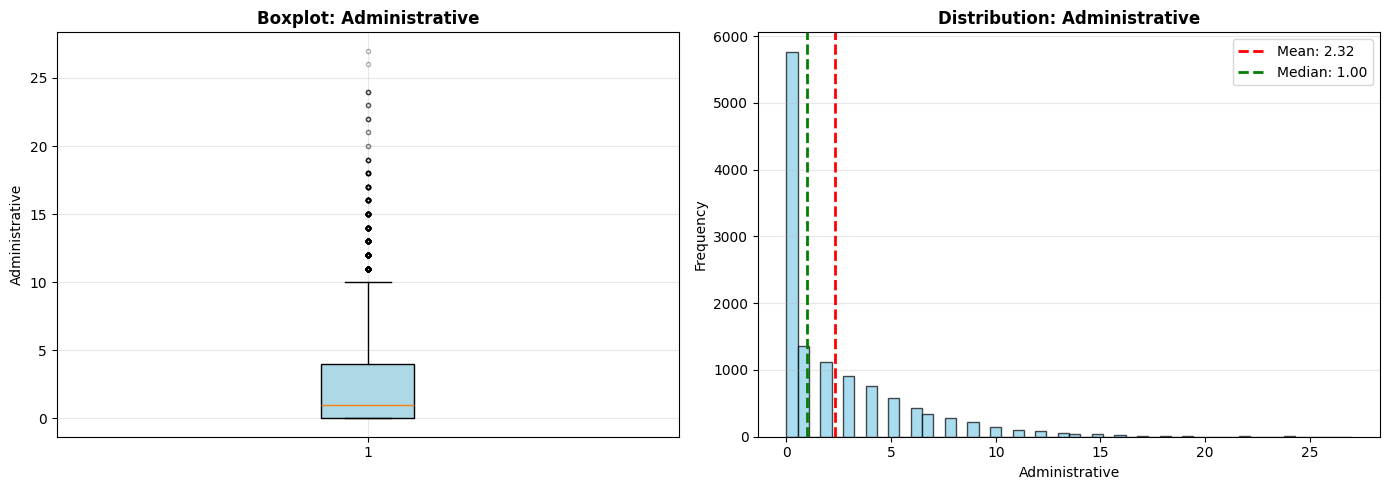


ANALYSIS: Administrative_Duration
Total Records: 12330
Mean: 80.82
Median: 7.50
Std Dev: 176.78
Range: [0.00, 3398.75]
IQR: 93.26
Outlier Bounds: [-139.88, 233.14]
Outliers Found: 1172 (9.51%)


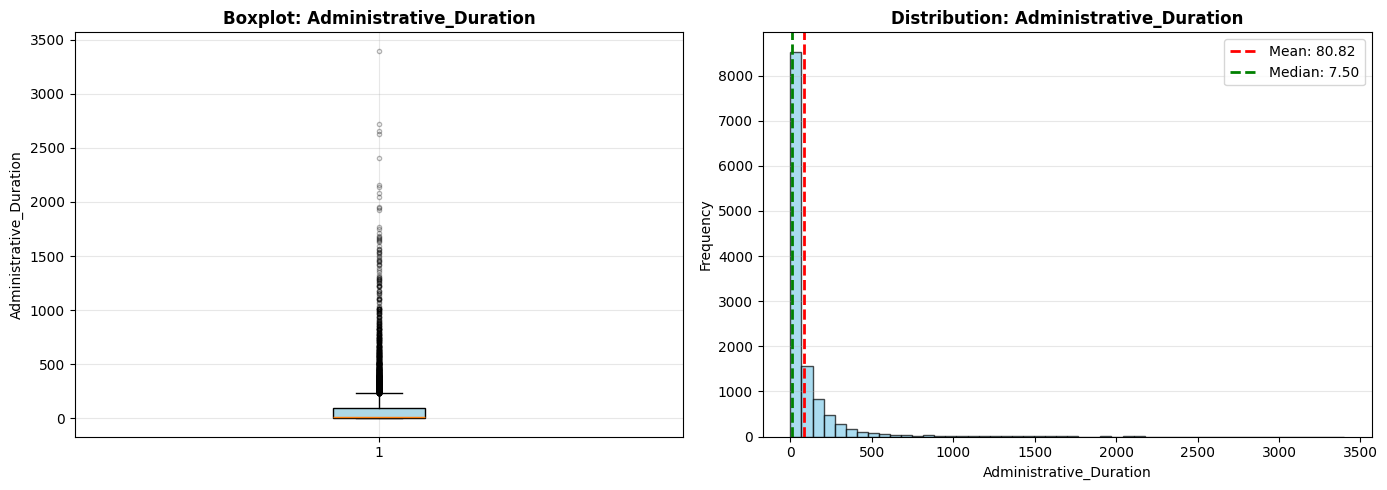


ANALYSIS: Informational
Total Records: 12330
Mean: 0.50
Median: 0.00
Std Dev: 1.27
Range: [0.00, 24.00]
IQR: 0.00
Outlier Bounds: [0.00, 0.00]
Outliers Found: 2631 (21.34%)


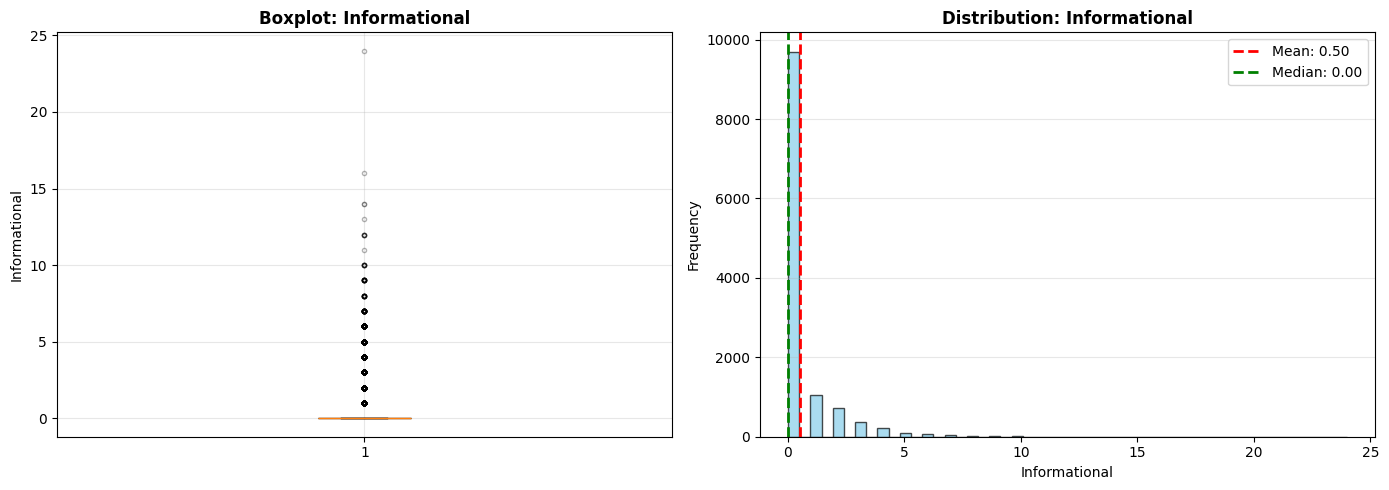


ANALYSIS: Informational_Duration
Total Records: 12330
Mean: 34.47
Median: 0.00
Std Dev: 140.75
Range: [0.00, 2549.38]
IQR: 0.00
Outlier Bounds: [0.00, 0.00]
Outliers Found: 2405 (19.51%)


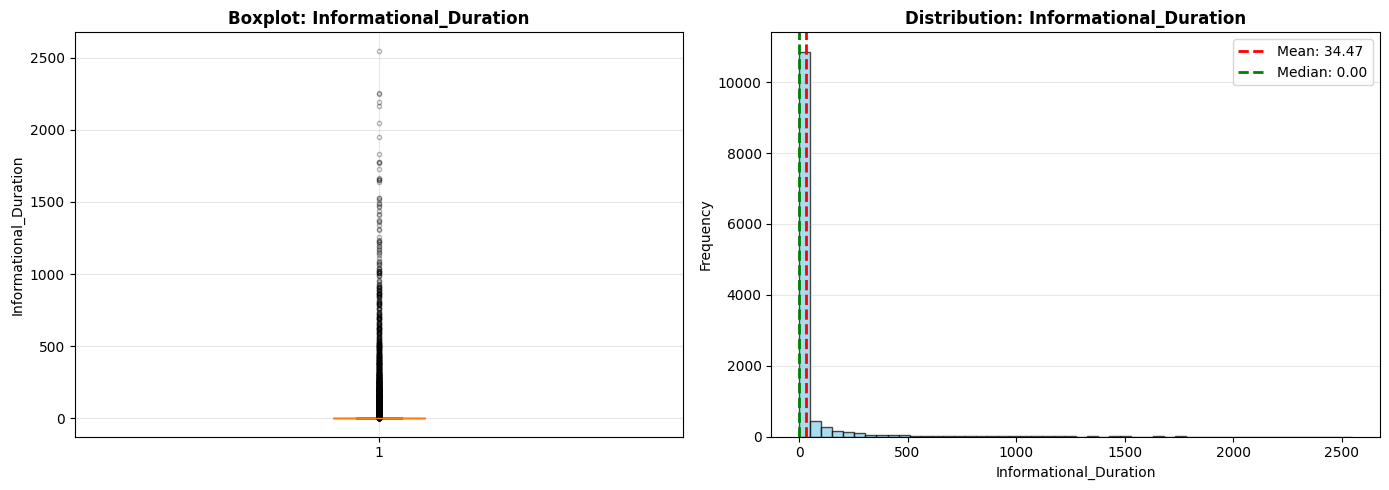


ANALYSIS: ProductRelated
Total Records: 12330
Mean: 31.73
Median: 18.00
Std Dev: 44.48
Range: [0.00, 705.00]
IQR: 31.00
Outlier Bounds: [-39.50, 84.50]
Outliers Found: 987 (8.00%)


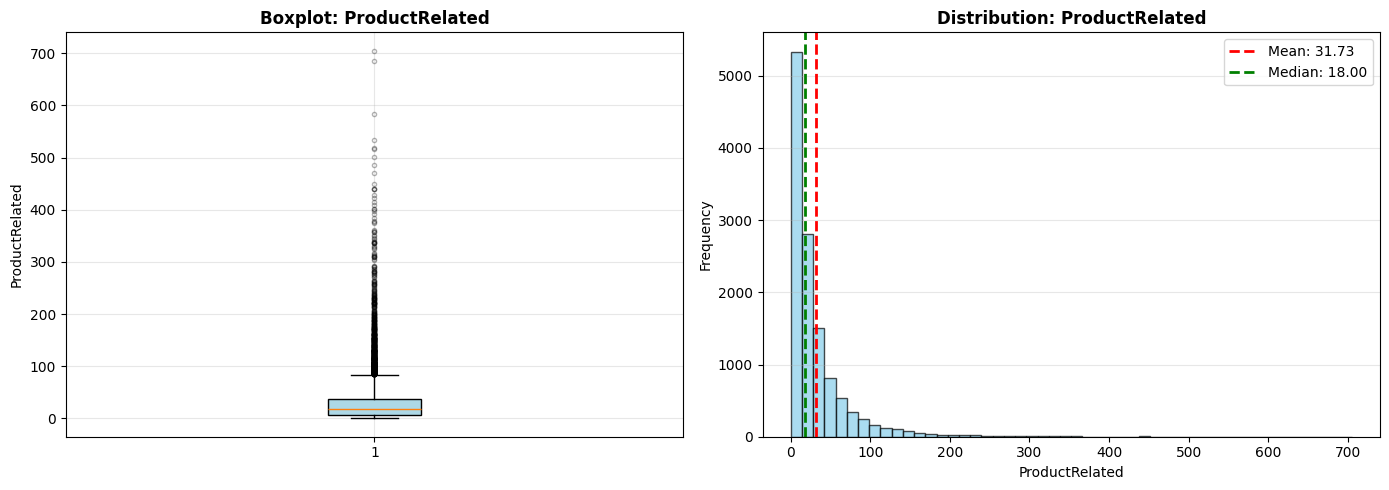


ANALYSIS: ProductRelated_Duration
Total Records: 12330
Mean: 1194.75
Median: 598.94
Std Dev: 1913.67
Range: [0.00, 63973.52]
IQR: 1280.02
Outlier Bounds: [-1735.89, 3384.19]
Outliers Found: 961 (7.79%)


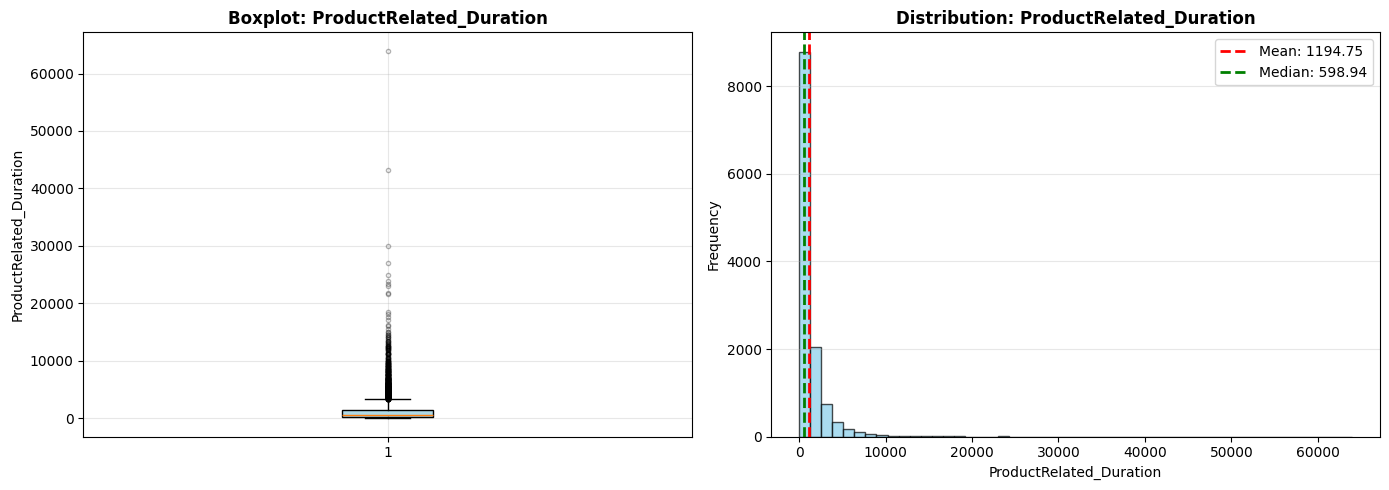


ANALYSIS: PageValues
Total Records: 12330
Mean: 5.89
Median: 0.00
Std Dev: 18.57
Range: [0.00, 361.76]
IQR: 0.00
Outlier Bounds: [0.00, 0.00]
Outliers Found: 2730 (22.14%)


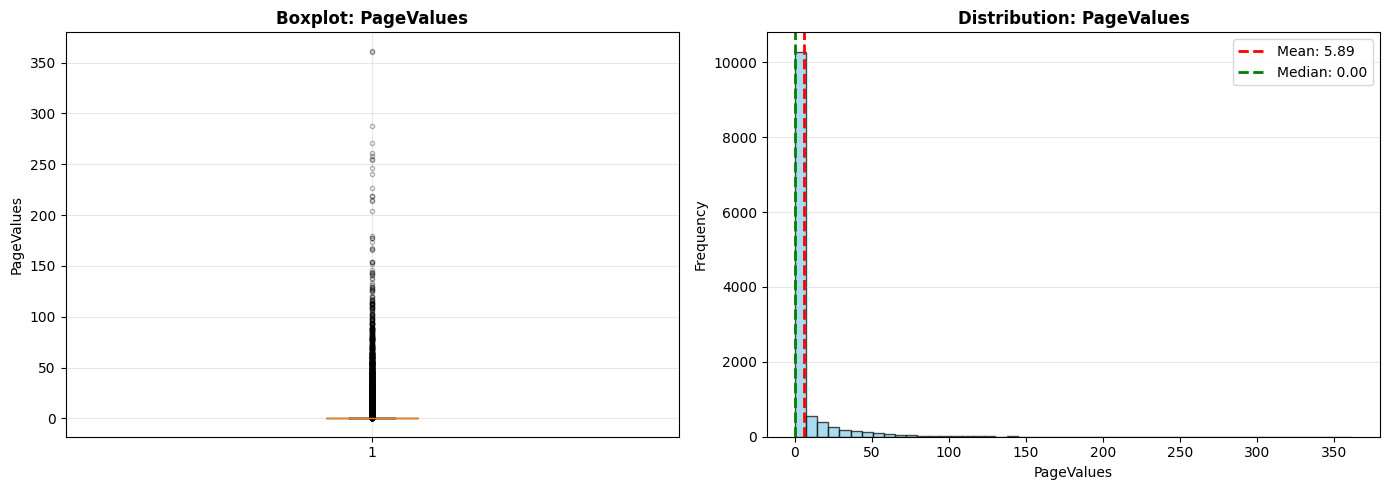

In [ ]:
# --- COMPLETE OUTLIER HANDLING PIPELINE ---

outlier_cols = [
    "Administrative", "Administrative_Duration",
    "Informational", "Informational_Duration",
    "ProductRelated", "ProductRelated_Duration",
    "PageValues"
]

# STEP 1: Analyze and visualize outliers
def analyze_single_feature(df, column):
    """Detailed analysis of a single feature with visualization"""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    
    print(f"\n{'='*60}")
    print(f"ANALYSIS: {column}")
    print(f"{'='*60}")
    print(f"Total Records: {len(df)}")
    print(f"Mean: {df[column].mean():.2f}")
    print(f"Median: {df[column].median():.2f}")
    print(f"Std Dev: {df[column].std():.2f}")
    print(f"Range: [{df[column].min():.2f}, {df[column].max():.2f}]")
    print(f"IQR: {IQR:.2f}")
    print(f"Outlier Bounds: [{lower:.2f}, {upper:.2f}]")
    print(f"Outliers Found: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    axes[0].boxplot(df[column].dropna(), vert=True, patch_artist=True,
                    boxprops=dict(facecolor='lightblue'),
                    flierprops=dict(marker='o', markersize=3, alpha=0.3, color='red'))
    axes[0].set_title(f'Boxplot: {column}', fontweight='bold')
    axes[0].set_ylabel(column)
    axes[0].grid(True, alpha=0.3)
    
    axes[1].hist(df[column].dropna(), bins=50, color='skyblue', 
                edgecolor='black', alpha=0.7)
    axes[1].axvline(df[column].mean(), color='red', linestyle='--', 
                   linewidth=2, label=f'Mean: {df[column].mean():.2f}')
    axes[1].axvline(df[column].median(), color='green', linestyle='--', 
                   linewidth=2, label=f'Median: {df[column].median():.2f}')
    axes[1].set_title(f'Distribution: {column}', fontweight='bold')
    axes[1].set_xlabel(column)
    axes[1].set_ylabel('Frequency')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()
    
    return outliers.index

# STEP 2: Collect all outlier indices
all_outlier_indices = set()

print("\n" + "="*80)
print("PHASE 1: OUTLIER DETECTION & VISUALIZATION")
print("="*80)

for col in outlier_cols:
    outlier_indices = analyze_single_feature(df, col)
    all_outlier_indices.update(outlier_indices)

# STEP 3: Remove outliers
print("\n" + "="*80)
print("PHASE 2: OUTLIER REMOVAL")
print("="*80)
print(f"Original dataset size: {len(df)} rows")
print(f"Total unique outlier rows: {len(all_outlier_indices)} rows")
print(f"Percentage to be removed: {len(all_outlier_indices)/len(df)*100:.2f}%")

df_cleaned = df.drop(index=all_outlier_indices).reset_index(drop=True)

print(f"\n✅ Cleaned dataset size: {len(df_cleaned)} rows")
print(f"✅ Rows removed: {len(df) - len(df_cleaned)}")
print("="*80)

# STEP 4: Compare before and after
print("\n" + "="*80)
print("PHASE 3: BEFORE vs AFTER COMPARISON")
print("="*80)

comparison_data = []
for col in outlier_cols:
    comparison_data.append({
        'Feature': col,
        'Mean_Before': round(df[col].mean(), 2),
        'Mean_After': round(df_cleaned[col].mean(), 2),
        'Std_Before': round(df[col].std(), 2),
        'Std_After': round(df_cleaned[col].std(), 2),
        'Max_Before': round(df[col].max(), 2),
        'Max_After': round(df_cleaned[col].max(), 2)
    })

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False))
print("="*80)

print(f"\n🎉 Final cleaned dataframe: df_cleaned ({len(df_cleaned)} rows)")

In [2]:
## Check feature contributing(which feature is important)

## df Preprocessing

In [ ]:
#Check duplicated data
df.duplicated().sum()

125

In [ ]:
#Check the sum of null data in each column
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [ ]:
# 3.1 Exact mappings requested
# VisitorType: Returning_Visitor→1, New_Visitor→2, others→3 (if present)
visitor_map = {"Returning_Visitor": 1, "New_Visitor": 2, "Other":3}
df["VisitorType_num"] = df["VisitorType"].map(visitor_map).fillna(3).astype(int)

# Month → number. UCI uses abbreviations like 'Feb', 'Mar', 'May', plus 'June'/'Dec' etc.
month_map = {
    "Jan":1, "Feb":2, "Mar":3, "Apr":4, "May":5, "Jun":6, "June":6, "Jul":7, "Aug":8,
    "Sep":9, "Oct":10, "Nov":11, "Dec":12
}
df["Month_num"] = df["Month"].map(month_map).astype("Int64")

# Weekend, Revenue → {True:1, False:0}
bool_map = {True:1, False:0}
df["Weekend_num"] = df["Weekend"].map(bool_map).astype(int)
df["Revenue_num"] = df["Revenue"].map(bool_map).astype(int)

In [ ]:
print(df.head())

   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay  ... Browser  Region  \
0         0.20       0.20         0.0         0.0  ...       1       1   
1         0.00       0.10         0.0         0.0  ...       2  

## Exploratory Data Analysis(EDA)

## Normalization And Train-Test Split

In [ ]:
## Z-score normalization or Min max scalar